In [1]:
import os
from fastai.vision.all import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_healthy_dir = './database/train_data/healthy'
train_sick_dir = './database/train_data/sick'
test_healthy_dir = './database/test_data/healthy'
test_sick_dir = './database/test_data/sick'

In [ ]:
k = os.listdir(train_healthy_dir)
for dir in k:
    dir += '/Segmentadas'
    print(os.listdir(train_healthy_dir+'/'+dir))


In [11]:
def get_images(path, label):
    ret = []
    for dir in os.listdir(path):
        dir += '/Segmentadas'
        for file in os.listdir(path+'/'+dir):
            ret.append((path+'/'+dir+'/'+file, label))
    
    return ret

In [13]:
train_healthy = get_images(train_healthy_dir, 'healthy')
train_sick = get_images(train_sick_dir, 'sick')
test_healthy = get_images(test_healthy_dir, 'healthy')
test_sick = get_images(test_sick_dir, 'sick')

c:\Users\vivek\.virtualenvs\Trial_1-vGwhy7Ry\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


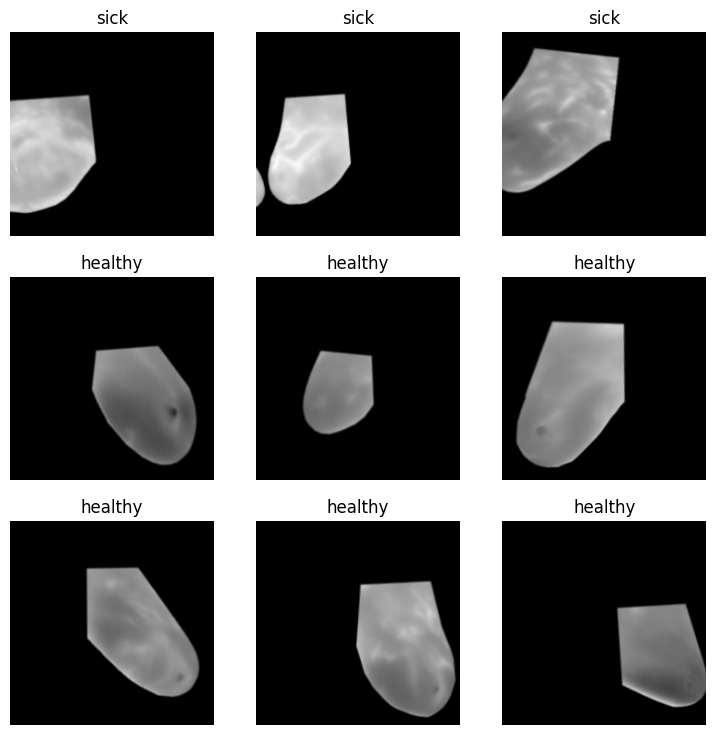

In [14]:
from fastai.vision.learner import vision_learner
from fastai.vision.models import resnet34
from fastai.vision.augment import aug_transforms

def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=ColReader(0),
                   get_y=ColReader(1),
                   splitter=RandomSplitter(),
                   item_tfms=Resize(size),
                   batch_tfms=aug_transforms(size=size, min_scale=0.75))
    return dblock.dataloaders(train_healthy+train_sick, bs=bs)

dls = get_dls(64, 224)
dls.show_batch()

c:\Users\vivek\.virtualenvs\Trial_1-vGwhy7Ry\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,time
0,0.936157,0.418661,03:24


epoch,train_loss,valid_loss,time
0,0.433622,0.361149,04:34
1,0.313585,0.086038,05:00
2,0.259192,0.100372,06:50
3,0.199255,0.136246,04:31


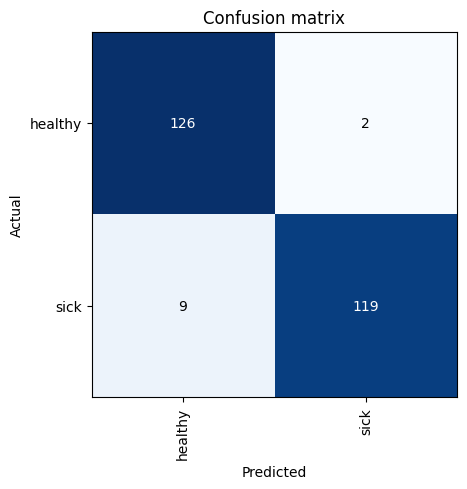

In [38]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4, 1e-3)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

c:\Users\vivek\.virtualenvs\Trial_1-vGwhy7Ry\lib\site-packages\fastai\torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


0.8875


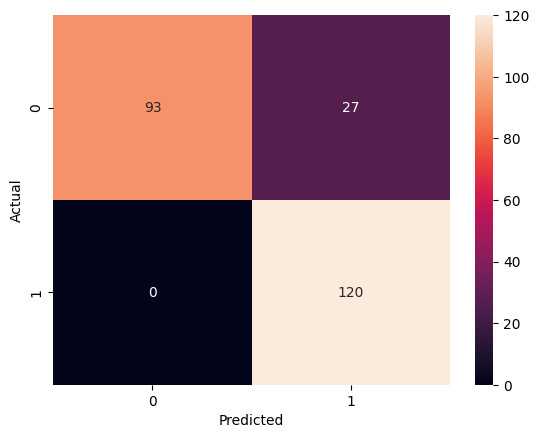

In [42]:
#test accuracy on test set
test_images = test_healthy+test_sick
test_dl = dls.test_dl(test_images)

preds = learn.get_preds(dl=test_dl)
preds = preds[0].argmax(dim=-1)
preds = [dls.vocab[i] for i in preds]
labels = [i[1] for i in test_images]

0.8875
['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'h

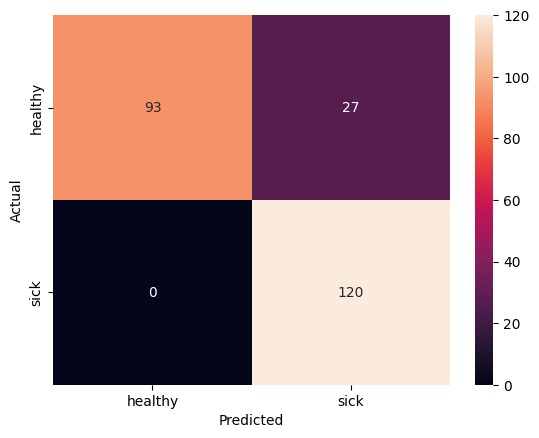

In [47]:
print(accuracy_score(labels, preds))
print(labels, preds)
#plot confusion matrix from labels and preds
cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['healthy', 'sick'], yticklabels=['healthy', 'sick'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()